In [38]:
import os
import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
import imghdr
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model


In [39]:
print(tf. __version__)

2.11.0


In [40]:
data_dir = 'data2' 

In [41]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [42]:
for image_class in os.listdir(data_dir): 
    if image_class != ".DS_Store":
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)

KeyboardInterrupt: 

# 3. Load data

In [70]:
data = tf.keras.utils.image_dataset_from_directory('data2',
                                                    color_mode = "rgb",
                                                   label_mode= "categorical",
                                                  class_names=["adventure", "comfort", "danger", "death", "desire", "excitement", "fitness", "freedom", "fun", "humor", "hunger", "power", "protection", "safety", "violence"])

Found 6762 files belonging to 15 classes.


In [71]:
# convert into numpy iterator
data_iterator = data.as_numpy_iterator()
len(data)

212

In [62]:
# get another batch from the iterator
batch = data_iterator.next()

2022-12-12 18:20:05.185190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 18:20:05.185245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


In [106]:
len(batch) # is 2 because there are the images, and then their are the labels
batch[0] # is the image data represented as numpy arrays
batch[0].shape # one batch has 32 items, each item is a color image of 256 by 256
# batch[1] # is the label data
# batch[1].shape # # one batch has 32 items, each item is an int that gives the label

(32, 256, 256, 3)

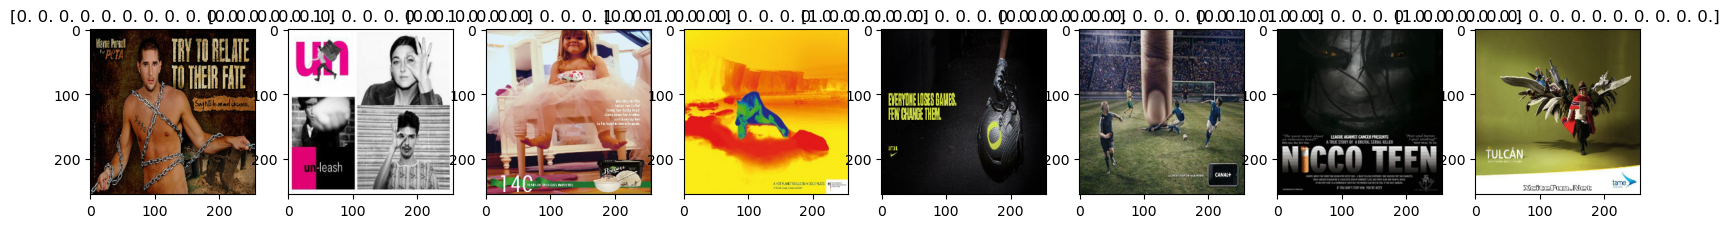

In [73]:
#this is to check which class is assigned to which integer
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [65]:
batch[0].max()

255.0

In [57]:
scaled= batch[0]/255

In [58]:
scaled.max()

1.0

In [74]:
data = data.map(lambda x,y: (x/255, y))

In [75]:
scaled_iterator = data.as_numpy_iterator()

In [81]:
batch = scaled_iterator.next()

In [82]:
batch[0].max()

1.0

# 2. Split data

In [50]:
len(data) # it is 212 because there are 212 batches of 32 img each = 6784 img

212

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 #(we add one because without it we are only using 211 of the 212 batches total)

In [89]:
train_size
val_size 
test_size

22

In [90]:
train_size + val_size + test_size

212

In [95]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

42

# Build Deep Learning Model

In [118]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [135]:
model = tf.keras.models.Sequential([
#     Flatten(input_shape = (256, 256,3)),
    # for the conv layers, the three numbers are the number of filters, the size of the filters, and the stride
    #the first layer has 16 filters, each filter is 3 pixels by 3 pixels, and has a stride of 1
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    # maxpooling takes the maximum value after activation and returns 
    # it goes over 2 by 2 (default) regions, take the max value out of that region, which reduces the image data by half
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    # fully connected layers
    Dense(256, activation='relu'),
    Dense(15, activation='sigmoid')
])


In [136]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

# Train

In [138]:
logdir='logs'

In [139]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
  7/148 [>.............................] - ETA: 3:35 - loss: 2.8091 - accuracy: 0.0714

2022-12-12 19:16:25.942631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:16:25.942704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 3:10 - loss: 2.7205 - accuracy: 0.1042

2022-12-12 19:16:46.874169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:16:46.874314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 46s - loss: 2.5944 - accuracy: 0.1469

2022-12-12 19:18:50.053300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:18:50.053768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 37s - loss: 2.5899 - accuracy: 0.1490

2022-12-12 19:18:56.967206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:18:56.967744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 18s - loss: 2.5894 - accuracy: 0.1497

2022-12-12 19:19:11.068401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:19:11.068479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 2.5859 - accuracy: 0.1520

2022-12-12 19:19:30.562402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:19:30.562444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:19:35.288258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:19:35.288298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:19:59.404193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:19:59.406210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:20:01.096001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:20:01.096203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:20:05.335843: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 261s 2s/step - loss: 2.5859 - accuracy: 0.1520 - val_loss: 2.5467 - val_accuracy: 0.1875
Epoch 2/20
  7/148 [>.............................] - ETA: 2:57 - loss: 2.5181 - accuracy: 0.2009

2022-12-12 19:20:45.088686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:20:45.089361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:26 - loss: 2.5216 - accuracy: 0.1875

2022-12-12 19:21:00.670011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:21:00.670053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 39s - loss: 2.4885 - accuracy: 0.1911

2022-12-12 19:22:47.377523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:22:47.377798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 32s - loss: 2.4896 - accuracy: 0.1914

2022-12-12 19:22:53.582755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:22:53.582781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 2.4919 - accuracy: 0.1912

2022-12-12 19:23:08.110092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:23:08.110130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 2.4907 - accuracy: 0.1917

2022-12-12 19:23:28.085494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:23:28.085690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:23:33.226386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:23:33.226420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:23:58.576649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:23:58.576683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:23:59.963483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:23:59.963516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:24:03.872508: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 233s 2s/step - loss: 2.4907 - accuracy: 0.1917 - val_loss: 2.5113 - val_accuracy: 0.1979
Epoch 3/20
  7/148 [>.............................] - ETA: 2:44 - loss: 2.3811 - accuracy: 0.2232

2022-12-12 19:24:36.393872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:24:36.393909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:19 - loss: 2.4054 - accuracy: 0.2188

2022-12-12 19:24:51.427521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:24:51.427702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 36s - loss: 2.2637 - accuracy: 0.2552

2022-12-12 19:26:30.973406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:26:30.973441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 30s - loss: 2.2644 - accuracy: 0.2536

2022-12-12 19:26:37.707945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:26:37.707978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 2.2642 - accuracy: 0.2572

2022-12-12 19:26:57.497335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:26:57.497371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 2.2699 - accuracy: 0.2551

2022-12-12 19:27:17.787180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:27:17.787301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:27:22.781615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:27:22.781651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:27:48.611232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:27:48.611261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:27:50.100403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:27:50.100429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:27:53.680026: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 229s 2s/step - loss: 2.2699 - accuracy: 0.2551 - val_loss: 2.5788 - val_accuracy: 0.1853
Epoch 4/20
  7/148 [>.............................] - ETA: 2:33 - loss: 2.0848 - accuracy: 0.3125

2022-12-12 19:28:24.945972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:28:24.946005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:11 - loss: 2.1069 - accuracy: 0.3095

2022-12-12 19:28:39.075651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:28:39.075685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 33s - loss: 1.8111 - accuracy: 0.4161

2022-12-12 19:30:10.389896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:30:10.390379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 27s - loss: 1.8074 - accuracy: 0.4185

2022-12-12 19:30:16.200586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:30:16.201246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 13s - loss: 1.8317 - accuracy: 0.4158

2022-12-12 19:30:29.581501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:30:29.581525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 1.8553 - accuracy: 0.4065

2022-12-12 19:30:48.968894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:30:48.968928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:30:53.782586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:30:53.782618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:31:17.767275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:31:17.767306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:31:19.197926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:31:19.197958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:31:22.856110: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 209s 1s/step - loss: 1.8553 - accuracy: 0.4065 - val_loss: 2.7192 - val_accuracy: 0.1771
Epoch 5/20
  7/148 [>.............................] - ETA: 2:42 - loss: 1.7883 - accuracy: 0.4375

2022-12-12 19:31:53.839707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:31:53.839746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:14 - loss: 1.7275 - accuracy: 0.4494

2022-12-12 19:32:08.176958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:32:08.176986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 37s - loss: 1.4210 - accuracy: 0.5548

2022-12-12 19:33:52.725609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:33:52.725675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 31s - loss: 1.4165 - accuracy: 0.5560

2022-12-12 19:33:59.365497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:33:59.365538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 1.4181 - accuracy: 0.5536

2022-12-12 19:34:15.040310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:34:15.040335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 1.4444 - accuracy: 0.5481

2022-12-12 19:34:43.389015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:34:43.389047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:34:49.133515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:34:49.133571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:35:14.907683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:35:14.907710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:35:16.538424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:35:16.538452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:35:20.528262: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 239s 2s/step - loss: 1.4444 - accuracy: 0.5481 - val_loss: 3.1181 - val_accuracy: 0.1801
Epoch 6/20
  7/148 [>.............................] - ETA: 3:11 - loss: 1.3933 - accuracy: 0.5268

2022-12-12 19:35:54.703969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:35:54.710945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:43 - loss: 1.3268 - accuracy: 0.5833

2022-12-12 19:36:12.267329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:36:12.267367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 37s - loss: 1.0977 - accuracy: 0.6680

2022-12-12 19:37:52.288892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:37:52.289744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 31s - loss: 1.0912 - accuracy: 0.6680

2022-12-12 19:37:59.060184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:37:59.060749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 1.0883 - accuracy: 0.6677

2022-12-12 19:38:15.862392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:38:15.863931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 1.1075 - accuracy: 0.6622

2022-12-12 19:38:39.034976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:38:39.035046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:38:44.401613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:38:44.401640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:39:11.887681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:39:11.887890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:39:13.486109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:39:13.486141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:39:17.768551: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 237s 2s/step - loss: 1.1075 - accuracy: 0.6622 - val_loss: 3.7433 - val_accuracy: 0.1979
Epoch 7/20
  7/148 [>.............................] - ETA: 2:55 - loss: 1.0334 - accuracy: 0.6920

2022-12-12 19:39:51.048610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:39:51.049162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:22 - loss: 1.0175 - accuracy: 0.7039

2022-12-12 19:40:06.031238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:40:06.031277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 37s - loss: 0.8440 - accuracy: 0.7623

2022-12-12 19:41:48.748513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:41:48.748795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 30s - loss: 0.8443 - accuracy: 0.7633

2022-12-12 19:41:54.825722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:41:54.825757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 0.8452 - accuracy: 0.7635

2022-12-12 19:42:10.073120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:42:10.073167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 0.8718 - accuracy: 0.7576

2022-12-12 19:42:31.370258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:42:31.370299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:42:37.069768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:42:37.069832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:43:05.067573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:43:05.067597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:43:06.742501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:43:06.742543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:43:10.813001: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 235s 2s/step - loss: 0.8718 - accuracy: 0.7576 - val_loss: 4.4704 - val_accuracy: 0.1815
Epoch 8/20
  7/148 [>.............................] - ETA: 2:44 - loss: 0.8005 - accuracy: 0.7679

2022-12-12 19:43:46.372507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:43:46.372545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 2:23 - loss: 0.7217 - accuracy: 0.7917

2022-12-12 19:44:02.014860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:44:02.014898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 36s - loss: 0.7126 - accuracy: 0.8095

2022-12-12 19:45:39.852392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:45:39.852779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 29s - loss: 0.7022 - accuracy: 0.8115

2022-12-12 19:45:46.446489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:45:46.446530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 15s - loss: 0.6955 - accuracy: 0.8144

2022-12-12 19:46:03.312707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:46:03.316076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.8091

2022-12-12 19:46:37.618368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:46:37.618885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:46:46.101183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:46:46.101213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:47:28.245406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:47:28.245445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:47:30.461114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:47:30.461143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:47:36.875368: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 277s 2s/step - loss: 0.7233 - accuracy: 0.8091 - val_loss: 4.6745 - val_accuracy: 0.2150
Epoch 9/20
  7/148 [>.............................] - ETA: 4:04 - loss: 0.6548 - accuracy: 0.8214

2022-12-12 19:48:29.228475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:48:29.228511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 3:37 - loss: 0.6106 - accuracy: 0.8438

2022-12-12 19:48:53.156553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:48:53.156597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 57s - loss: 0.6721 - accuracy: 0.8284

2022-12-12 19:51:30.191820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:51:30.191873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 47s - loss: 0.6653 - accuracy: 0.8310

2022-12-12 19:51:41.196120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:51:41.196157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 23s - loss: 0.6614 - accuracy: 0.8337

2022-12-12 19:52:04.052472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:52:04.052501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.8288

2022-12-12 19:52:36.583858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:52:36.583954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:52:45.382067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:52:45.382111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:53:26.390476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:53:26.391325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:53:28.777775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:53:28.777802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:53:34.952644: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 356s 2s/step - loss: 0.6877 - accuracy: 0.8288 - val_loss: 4.5382 - val_accuracy: 0.2091
Epoch 10/20
  7/148 [>.............................] - ETA: 4:04 - loss: 0.7193 - accuracy: 0.7366

2022-12-12 19:54:25.754955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:54:25.754991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 3:33 - loss: 0.6265 - accuracy: 0.8110

2022-12-12 19:54:49.090761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:54:49.090795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


114/148 [======================>.......] - ETA: 58s - loss: 0.6281 - accuracy: 0.8416 

2022-12-12 19:57:30.760942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:57:30.760974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


120/148 [=======================>......] - ETA: 48s - loss: 0.6284 - accuracy: 0.8404

2022-12-12 19:57:40.727043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:57:40.727080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


134/148 [==========================>...] - ETA: 24s - loss: 0.6215 - accuracy: 0.8417

2022-12-12 19:58:05.563394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:58:05.563424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


148/148 [==============================] - ETA: 0s - loss: 0.6494 - accuracy: 0.8387

2022-12-12 19:58:44.632754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:58:44.633511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:58:53.201554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:58:53.201592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:59:38.507395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:59:38.507771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:59:40.966667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 19:59:40.966695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2022-12-12 19:59:47.514579: W tensorflow/core/lib/png/png_io.cc:

148/148 [==============================] - 376s 3s/step - loss: 0.6494 - accuracy: 0.8387 - val_loss: 4.5043 - val_accuracy: 0.2277
Epoch 11/20
  7/148 [>.............................] - ETA: 3:57 - loss: 0.6202 - accuracy: 0.8705

2022-12-12 20:00:41.457683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 20:00:41.457719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 21/148 [===>..........................] - ETA: 3:48 - loss: 0.5427 - accuracy: 0.8646

2022-12-12 20:01:07.451760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-12 20:01:07.451799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


 84/148 [================>.............] - ETA: 2:00 - loss: 0.4841 - accuracy: 0.8824

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# Test

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))v

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))